# ANÁLISE DE REGRESSÃO SIMPLES E MÚLTIPLA

Supervised Machine Learning

Universidade de São Paulo

MBA Data Science e Analytics

Prof. Dr. Luiz Paulo Fávero

coding: utf-8

In [357]:
# Instalação dos pacotes.

# !pip install pandas
# !pip install numpy
# !pip install -U seaborn
# !pip install matplotlib
# !pip install plotly
# !pip install scipy
# !pip install statsmodels
# !pip install scikit-learn
# !pip install pingouin
# !pip install emojis
# !pip install statstests

In [358]:
# Importação dos pacotes.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from sklearn.preprocessing import LabelEncoder
import pingouin as pg
import emojis
from statstests.process import stepwise
from statstests.tests import shapiro_francia
from scipy.stats import boxcox
from scipy.stats import norm
from scipy import stats
import networkx as nx
import matplotlib.cm as cm
from scipy import interpolate
from scipy.stats import shapiro
from statstests.tests import shapiro_francia
from scipy.stats import boxcox
import pingouin as pg

import warnings
warnings.filterwarnings("ignore")


## REGRESSÃO LINEAR SIMPLES

In [359]:
# Carregamento da base de dados.
url = 'https://raw.githubusercontent.com/filipecarbonera/MBA_USP_Data_Science_Analytics/main/An%C3%A1lise%20de%20Regress%C3%A3o%20Simples%20e%20M%C3%BAltipla/tempodist.csv'

df_tempodist = pd.read_csv(url, delimiter=',')
df_tempodist

,tempo,distancia
0,15,8
1,20,6
2,20,15
3,40,20
4,50,25
5,25,11
6,10,5
7,55,32
8,35,28
9,30,20


In [360]:
# Características das variáveis do dataset.
df_tempodist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tempo      10 non-null     int64
 1   distancia  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [361]:
# Estatísticas univariadas.
df_tempodist.describe()

,tempo,distancia
count,10.00000,10.000000
mean,30.00000,17.000000
std,14.90712,9.510228
min,10.00000,5.000000
25%,20.00000,8.750000
50%,27.50000,17.500000
75%,38.75000,23.750000
max,55.00000,32.000000


<function matplotlib.pyplot.show(close=None, block=None)>

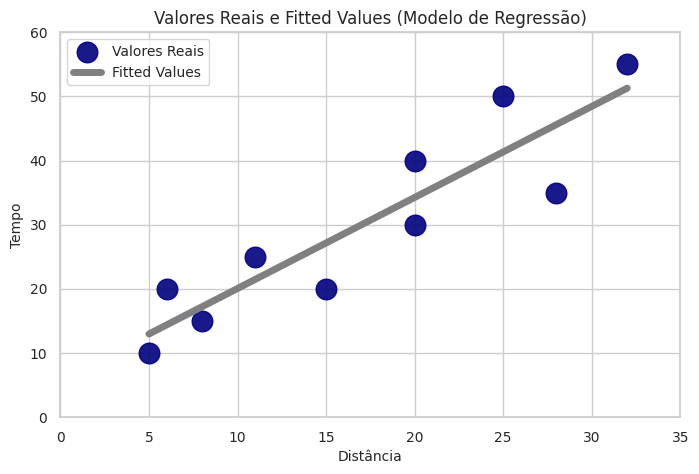

In [362]:
#  Gráfico de dispersão com o ajuste linear (fitted values de um modelo de regressão) que se adequa às observações.

plt.figure(figsize=(8,5))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=False,
            scatter_kws={"color":'navy', 'alpha':0.9, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('Valores Reais e Fitted Values (Modelo de Regressão)', fontsize=12)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Tempo', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=10, loc='upper left')
plt.show

In [363]:
# Estimação do modelo de regressão linear simples.
modelo = sm.OLS.from_formula('tempo ~ distancia', df_tempodist).fit()

# Observação dos parâmetros resultantes da estimação.
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           0.000314
Time:                        15:46:32   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      4.532      1.297      0.231      -4.573      16.330
distancia      1.4189      0.235      6.025      0.000       0.876       1.962
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.694
Skew:                          -0.262   Prob(JB):                        0.707
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [364]:
# Salvando fitted values (variável yhat) e residuals (variável erro) no dataset.

df_tempodist['yhat'] = modelo.fittedvalues
df_tempodist['erro'] = modelo.resid
df_tempodist

,tempo,distancia,yhat,erro
0,15,8,17.229730,-2.229730
1,20,6,14.391892,5.608108
2,20,15,27.162162,-7.162162
3,40,20,34.256757,5.743243
4,50,25,41.351351,8.648649
5,25,11,21.486486,3.513514
6,10,5,12.972973,-2.972973
7,55,32,51.283784,3.716216
8,35,28,45.608108,-10.608108
9,30,20,34.256757,-4.256757


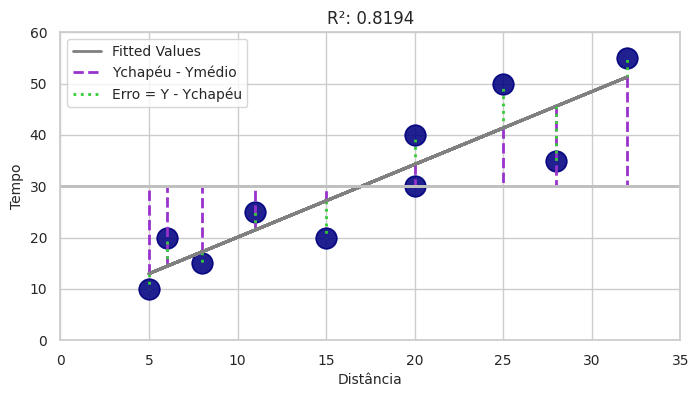

In [365]:
# Gráfico didático para visualizar o conceito de R².

plt.figure(figsize=(8,4))
y = df_tempodist['tempo']
yhat = df_tempodist['yhat']
x = df_tempodist['distancia']
mean = np.full(x.shape[0] , y.mean(), dtype=int)

for i in range(len(x)-1):
    plt.plot(x, yhat, color='grey', linewidth=2)
    plt.plot([x[i], x[i]], [yhat[i], mean[i]], '--', color='darkorchid', linewidth=2)
    plt.plot([x[i], x[i]], [yhat[i], y[i]],':', color='limegreen', linewidth=2)
    plt.scatter(x, y, color='navy', s=220, alpha=0.2)
    plt.axhline(y = y.mean(), color = 'silver', linestyle = '-', linewidth=2)
    plt.title('R²: ' + str(round(modelo.rsquared, 4)), fontsize=12)
    plt.xlabel('Distância', fontsize=10)
    plt.ylabel('Tempo', fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim(0, 35)
    plt.ylim(0, 60)
    plt.legend(['Fitted Values', 'Ychapéu - Ymédio', 'Erro = Y - Ychapéu'], fontsize=10, loc='upper left')
plt.show()

In [366]:
# Cálculo manual do R².
R2 = ((df_tempodist['yhat']-
       df_tempodist['tempo'].mean())**2).sum()/(((df_tempodist['yhat']-
       df_tempodist['tempo'].mean())**2).sum()+
       (df_tempodist['erro']**2).sum())

round(R2,4)

0.8194

Coeficiente de ajuste (R²) é a correlação ao quadrado.

In [367]:
# Correlação de Pearson.
df_tempodist[['tempo','distancia']].corr()

,tempo,distancia
tempo,1.000000,0.905221
distancia,0.905221,1.000000


In [368]:
# R².
(df_tempodist[['tempo','distancia']].corr())**2

,tempo,distancia
tempo,1.000000,0.819426
distancia,0.819426,1.000000


In [369]:
# R² de maneira direta.
modelo.rsquared

0.8194256756756757

                            OLS Regression Results                            
Dep. Variable:                   yhat   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.598e+31
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          1.72e-122
Time:                        15:46:33   Log-Likelihood:                 309.16
No. Observations:                  10   AIC:                            -614.3
Df Residuals:                       8   BIC:                            -613.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784   6.83e-15   8.61e+14      0.0

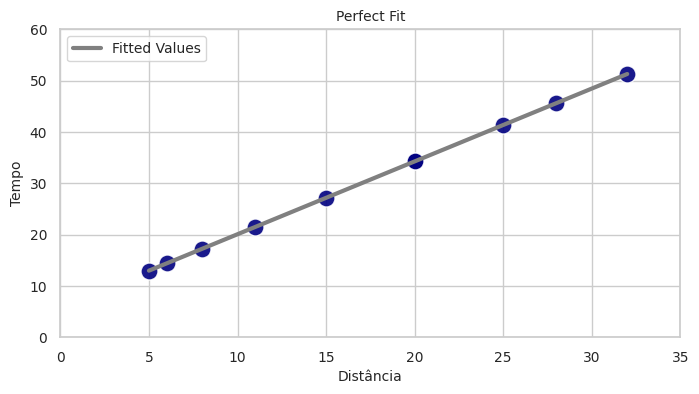

In [370]:
# Modelo auxiliar para mostrar R² igual a 100% (para fins didáticos).

# Estimação do modelo com yhat como variável dependente resultará em um modelo com R² igual a 100%.
modelo_auxiliar = sm.OLS.from_formula('yhat ~ distancia', df_tempodist).fit()

# Parâmetros resultantes da estimação deste modelo didático.
print(modelo_auxiliar.summary())

# Gráfico mostrando o perfect fit.

plt.figure(figsize=(8,4))
sns.scatterplot(data=df_tempodist, x='distancia', y='yhat',
                color='navy', alpha=0.9, s=150)
sns.regplot(data=df_tempodist, x='distancia', y='yhat', ci=False, scatter=False,
            label='Fitted Values',
            line_kws={"color":'grey', 'linewidth': 3})
plt.title('Perfect Fit', fontsize=10)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Tempo', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(loc='upper left', fontsize=10)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

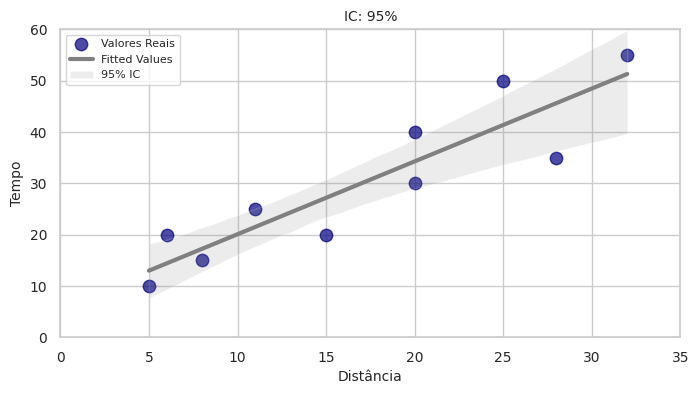

In [371]:
# Gráfico com intervalo de confiança de 95%.

plt.figure(figsize=(8,4))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=95,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':80},
            line_kws={"color":'grey', 'linewidth': 3})
plt.title('IC: 95%', fontsize=10)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Tempo', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '95% IC'], fontsize=8, loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

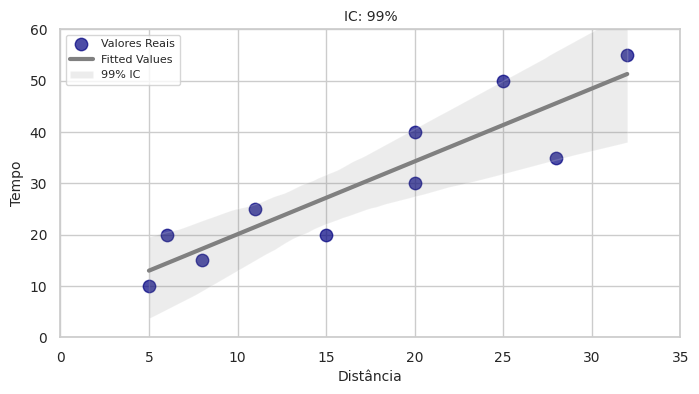

In [372]:
# Gráfico com intervalo de confiança de 99%.

plt.figure(figsize=(8,4))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=99,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':80},
            line_kws={"color":'grey', 'linewidth': 3})
plt.title('IC: 99%', fontsize=10)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Tempo', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '99% IC'],
           fontsize=8, loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

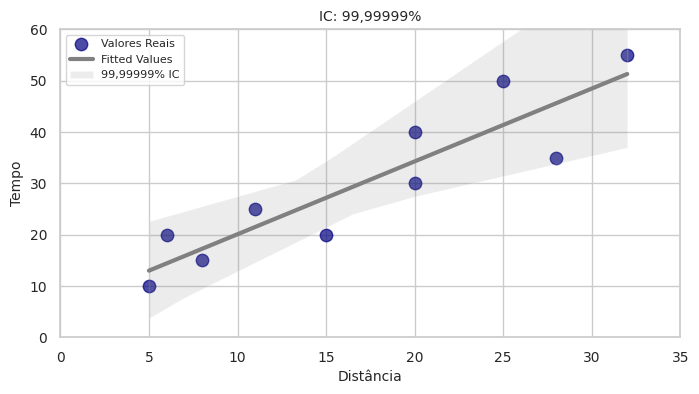

In [373]:
# Gráfico com intervalo de confiança de 99,99999%.

plt.figure(figsize=(8,4))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=99.99999,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':80},
            line_kws={"color":'grey', 'linewidth': 3})
plt.title('IC: 99,99999%', fontsize=10)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Tempo', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '99,99999% IC'], fontsize=8, loc='upper left')
plt.show

In [374]:
# Calculando os intervalos de confiança.

# Nível de significância de 10% / Nível de confiança de 90%.
print(modelo.conf_int(alpha=0.1),"\n")

# Nível de significância de 5% / Nível de confiança de 95%.
print(modelo.conf_int(alpha=0.05),"\n")

# Nível de significância de 1% / Nível de confiança de 99%.
print(modelo.conf_int(alpha=0.01),"\n")

# Nível de significância de 0,00001% / Nível de confiança de 99,99999%.
print(modelo.conf_int(alpha=0.0000001))

                  0          1
Intercept -2.549702  14.306459
distancia  0.981001   1.856837 

                  0          1
Intercept -4.573188  16.329944
distancia  0.875861   1.961977 

                  0          1
Intercept -9.329336  21.086093
distancia  0.628735   2.209103 

                   0          1
Intercept -74.960201  86.716957
distancia  -2.781409   5.619247


In [375]:
# Fazendo predições em modelos OLS.

# Ex.: Qual seria o tempo gasto, em média, para percorrer a distância de 25km?
# Cálculo manual
print(round(5.8784 + 1.4189*(25),2))

# Cálculo utilizando os próprios parâmetros estimados do modelo.
print(round(modelo.params[0] + modelo.params[1]*(25),2))

41.35
41.35


In [376]:
# Maneira direta utilizando a função 'DataFrame' do pacote 'pandas' dentro da função 'predict'.
modelo.predict(pd.DataFrame({'distancia':[25]}))

0    41.351351
dtype: float64

In [377]:
# Nova modelagem para o mesmo exemplo, com novo dataset que contém replicações.

# Quantas replicações de cada linha você quer? -> função 'repeat' do 'numpy'
df_replicado = pd.DataFrame(np.repeat(df_tempodist.values, 3, axis=0))
df_replicado.columns = df_tempodist.columns
df_replicado.head(12)

,tempo,distancia,yhat,erro
0,15.0,8.0,17.229730,-2.229730
1,15.0,8.0,17.229730,-2.229730
2,15.0,8.0,17.229730,-2.229730
3,20.0,6.0,14.391892,5.608108
4,20.0,6.0,14.391892,5.608108
5,20.0,6.0,14.391892,5.608108
6,20.0,15.0,27.162162,-7.162162
7,20.0,15.0,27.162162,-7.162162
8,20.0,15.0,27.162162,-7.162162
9,40.0,20.0,34.256757,5.743243


In [378]:
# Estimação do modelo com valores replicados.
modelo_replicado = sm.OLS.from_formula('tempo ~ distancia', df_replicado).fit()

# Parâmetros do 'modelo_replicado'.
modelo_replicado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     127.1
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           6.42e-12
Time:                        15:46:35   Log-Likelihood:                -96.369
No. Observations:                  30   AIC:                             196.7
Df Residuals:                      28   BIC:                             199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      2.423      2.426      0.022       0.916      10.841
distancia      1.4189      0.126     11.272      0.000       1.161       1.677
==============================================================================
Omnibus:                        5.437   Durbin-Watson:                   0.700
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                2.082
Skew:                          -0.262   Prob(JB):                        0.353
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [379]:
# Métricas do modelo original, para comparação com o 'modelo_replicado' acima.
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           0.000314
Time:                        15:46:36   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      4.532      1.297      0.231      -4.573      16.330
distancia      1.4189      0.235      6.025      0.000       0.876       1.962
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.694
Skew:                          -0.262   Prob(JB):                        0.707
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [380]:
# Calculando os novos intervalos de confiança.

# Nível de significância de 5% / Nível de confiança de 95%.
modelo_replicado.conf_int(alpha=0.05)

,0,1
Intercept,0.915844,10.840913
distancia,1.161068,1.676769


<function matplotlib.pyplot.show(close=None, block=None)>

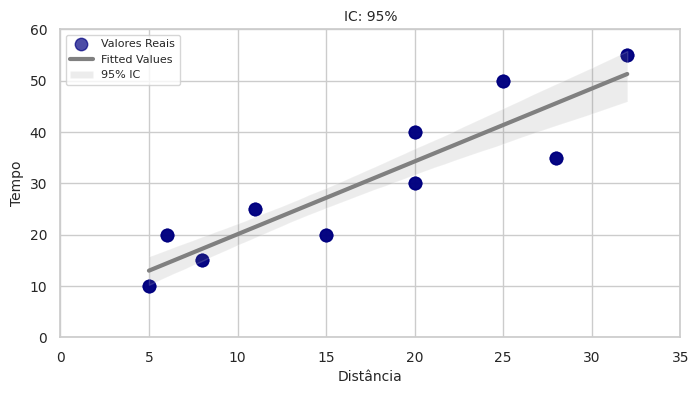

In [381]:
# Plotando o novo gráfico com intervalo de confiança de 95%.
# Note o estreitamento da amplitude dos intervalos de confiança!

plt.figure(figsize=(8,4))
sns.regplot(data=df_replicado, x='distancia', y='tempo', marker='o', ci=95,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':80},
            line_kws={"color":'grey', 'linewidth': 3})
plt.title('IC: 95%', fontsize=10)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Tempo', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '95% IC'], fontsize=8, loc='upper left')
plt.show

In [382]:
# PROCEDIMENTO ERRADO: ELIMINAR O INTERCEPTO QUANDO ESTE NÃO SE MOSTRAR ESTATISTICAMENTE SIGNIFICANTE.

modelo_errado = sm.OLS.from_formula('tempo ~ 0 + distancia', df_tempodist).fit()

# Parâmetros do 'modelo_errado'.
print(modelo_errado.summary())

# Comparando os parâmetros do modelo inicial (objeto 'modelo') com o 'modelo_errado' pela função 'summary_col' do pacote 'statsmodels.iolib.summary2'.
summary_col([modelo, modelo_errado])

# Outro modo mais completo também pela função 'summary_col'.
summary_col([modelo, modelo_errado],
            model_names=["MODELO INICIAL","MODELO ERRADO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

                                 OLS Regression Results                                
Dep. Variable:                  tempo   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              217.5
Date:                Sun, 04 Aug 2024   Prob (F-statistic):                    1.31e-07
Time:                        15:46:36   Log-Likelihood:                         -33.077
No. Observations:                  10   AIC:                                      68.15
Df Residuals:                       9   BIC:                                      68.46
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,MODELO INICIAL,MODELO ERRADO
Intercept,5.8784,
,(4.5323),
distancia,1.4189***,1.6887***
,(0.2355),(0.1145)
R-squared,0.8194,0.9603
R-squared Adj.,0.7969,0.9558
N,10,10


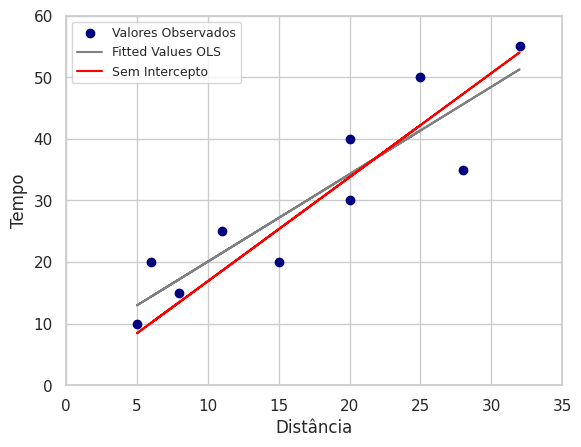

In [383]:
# Gráfico didático para visualizar o viés decorrente de se eliminar erroneamente o intercepto em modelos regressivos.
# Note que o 'modelo_errado' está apontando para o ponto (0,0).

x = df_tempodist['distancia']
y = df_tempodist['tempo']

yhat = df_tempodist['yhat']
yhat_errado = modelo_errado.fittedvalues

plt.plot(x, y, 'o', color='navy')
plt.plot(x, yhat, color='gray')
plt.plot(x, yhat_errado, color='red')
plt.xlabel("Distância")
plt.ylabel("Tempo")
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Observados','Fitted Values OLS', 'Sem Intercepto'], fontsize=9)
plt.show()

**DÚVIDA:** Qual estimação devo escolher?

**DECISÃO:** DEVO ESCOLHER O MODELO COM INTERCEPTO! SEMPRE!

## REGRESSÃO LINEAR MULTIPLA

In [384]:
# Carregando a base de dados.
url = 'https://raw.githubusercontent.com/filipecarbonera/MBA_USP_Data_Science_Analytics/main/An%C3%A1lise%20de%20Regress%C3%A3o%20Simples%20e%20M%C3%BAltipla/paises.csv'

df_paises = pd.read_csv(url, delimiter=',', encoding="utf-8")
df_paises.head()

,pais,cpi,idade,horas
0,Argentina,3.9,72,35.0
1,Australia,8.7,64,32.0
2,Austria,7.9,72,32.0
3,Belgium,7.1,67,30.1
4,Brazil,4.0,59,35.0


In [385]:
# Características das variáveis do dataset.
df_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pais    50 non-null     object 
 1   cpi     50 non-null     float64
 2   idade   50 non-null     int64  
 3   horas   50 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


In [386]:
# Estatísticas univariadas.
df_paises.describe()

,cpi,idade,horas
count,50.000000,50.000000,50.000000
mean,4.894000,60.480000,32.660000
std,2.678974,10.022913,2.431091
min,0.800000,34.000000,26.800000
25%,2.575000,58.000000,31.400000
50%,3.950000,62.000000,32.600000
75%,7.475000,66.750000,34.400000
max,9.300000,79.000000,38.100000


In [387]:
trace = go.Scatter3d(
    x=df_paises['horas'], 
    y=df_paises['idade'], 
    z=df_paises['cpi'], 
    mode='markers',
    marker={
        'size': 10,
        'color': 'darkorchid',
        'opacity': 0.7,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=500,
    height=500,
    plot_bgcolor='white',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(200, 200, 200)',
            backgroundcolor='whitesmoke'
        ),
        yaxis=dict(
            gridcolor='rgb(200, 200, 200)',
            backgroundcolor='whitesmoke'
        ),
        zaxis=dict(
            gridcolor='rgb(200, 200, 200)',
            backgroundcolor='whitesmoke'
        )
    )
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.update_layout(scene=dict(
    xaxis_title='horas',
    yaxis_title='idade',
    zaxis_title='cpi'
))

In [388]:
# Matriz de correlações.
correlation_matrix = df_paises.iloc[:,1:4].corr()
correlation_matrix

,cpi,idade,horas
cpi,1.000000,0.442838,-0.435724
idade,0.442838,1.000000,-0.191748
horas,-0.435724,-0.191748,1.000000


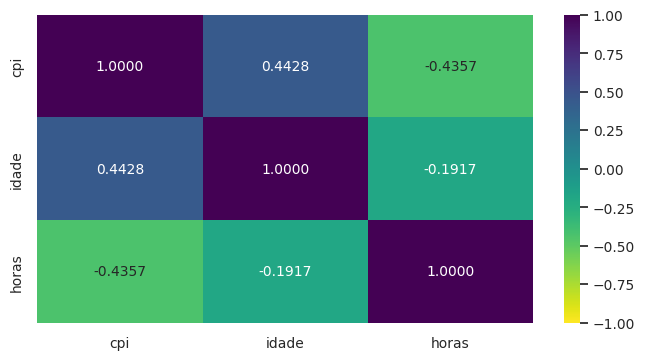

In [389]:
# Mapa de calor com as correlações entre todas as variáveis quantitativas.
plt.figure(figsize=(8, 4))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".4f",
                      cmap=plt.cm.viridis_r,
                      annot_kws={'size': 10}, vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.show()

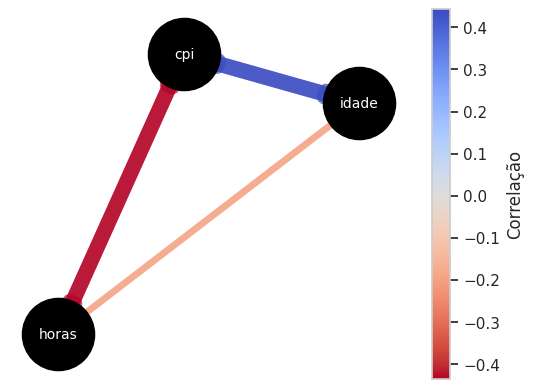

In [390]:
# Criação de um grafo direcionado
G = nx.DiGraph()

# Adição das variáveis como nós do grafo
for variable in correlation_matrix.columns:
    G.add_node(variable)

# Adição das arestas com espessuras proporcionais às correlações
for i, variable1 in enumerate(correlation_matrix.columns):
    for j, variable2 in enumerate(correlation_matrix.columns):
        if i != j:
            correlation = correlation_matrix.iloc[i, j]
            if abs(correlation) > 0:
                G.add_edge(variable1, variable2, weight=correlation)

# Obtenção da lista de correlações das arestas
correlations = [d["weight"] for _, _, d in G.edges(data=True)]

# Definição da dimensão dos nós
node_size = 2700

# Definição da cor dos nós
node_color = 'black'

# Definição da escala de cores das retas (correspondência com as correlações)
cmap = plt.colormaps.get_cmap('coolwarm_r')

# Criação de uma lista de espessuras das arestas proporcional às correlações
edge_widths = [abs(d["weight"]) * 25 for _, _, d in G.edges(data=True)]

# Criação do layout do grafo com maior distância entre os nós
pos = nx.spring_layout(G, k=0.75)  # k para controlar a distância entre os nós

# Desenho dos nós e das arestas com base nas correlações e espessuras
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=correlations,
                       edge_cmap=cmap, alpha=0.7)

# Adição dos rótulos dos nós
labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='white')

# Ajuste dos limites dos eixos
ax = plt.gca()
ax.margins(0.1)
plt.axis("off")

# Criação da legenda com a escala de cores definida
smp = cm.ScalarMappable(cmap=cmap)
smp.set_array([min(correlations), max(correlations)])
cbar = plt.colorbar(smp, ax=ax, label='Correlação')

# Exibição do gráfico
plt.show()

In [391]:
# Matriz de correlações mais elaborada, com uso da função 'rcorr' do pacote 'pingouin'.
correlation_matrix2 = pg.rcorr(df_paises, method='pearson', upper='pval', decimals=6, pval_stars={0.01: '***', 0.05: '**', 0.10: '*'})
correlation_matrix2

,cpi,idade,horas
cpi,-,***,***
idade,0.442838,-,
horas,-0.435724,-0.191748,-


<Figure size 800x800 with 0 Axes>

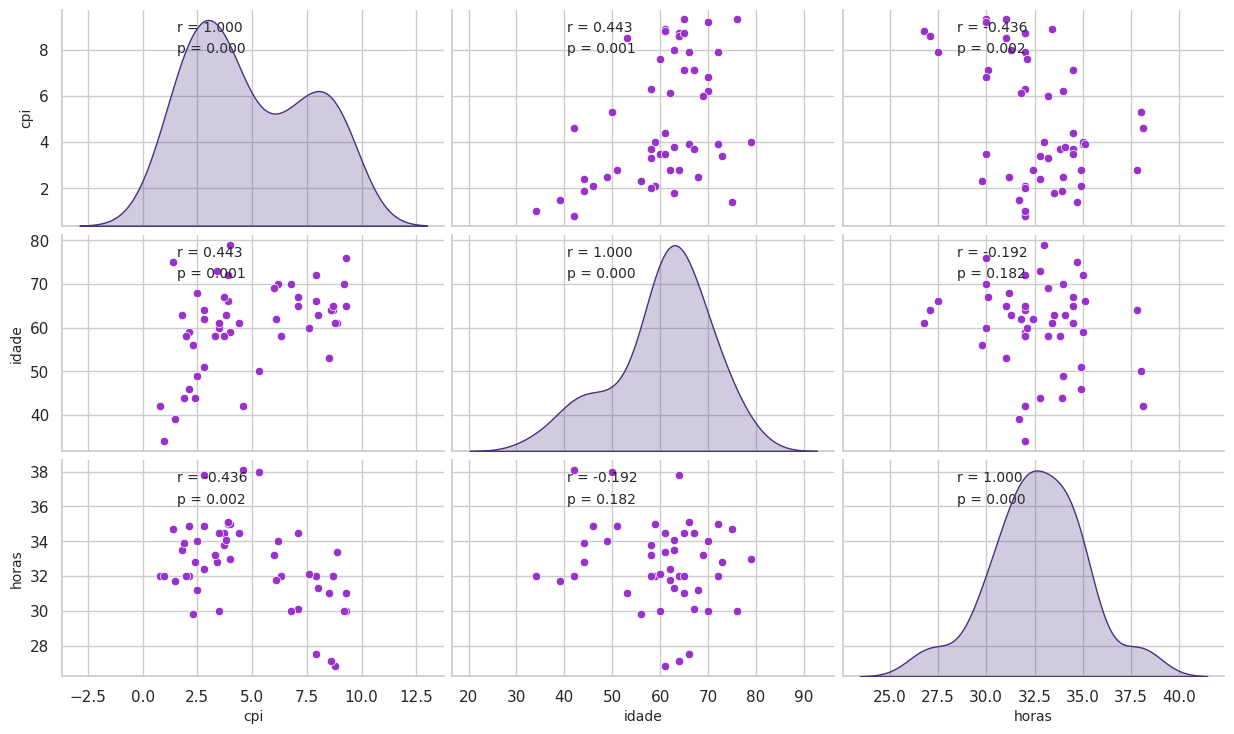

In [392]:
# Gráfico com distribuições das variáveis, scatters, valores das correlações e respectivas significâncias estatísticas.

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.3f}".format(r), xy=(.30, .9), xycoords=ax.transAxes, fontsize=10)
    ax.annotate("p = {:.3f}".format(p), xy=(.30, .8), xycoords=ax.transAxes, fontsize=10)

# Configuração do gráfico.
sns.set(style="whitegrid", palette="viridis")

plt.figure(figsize=(8,8))
graph = sns.pairplot(df_paises, diag_kind="kde", plot_kws={"color": "darkorchid"}, height=2.5, aspect=1.7)
graph.map(corrfunc)

for ax in graph.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)
plt.show()

In [393]:
# Estimação de um modelo de regressão múltipla com as variáveis do dataframe 'df_paises'.

# Estimando o modelo de regressão múltipla por OLS.
modelo_paises = sm.OLS.from_formula("cpi ~ idade + horas", df_paises).fit()

# Parâmetros do 'modelo_paises'.
modelo_paises.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cpi   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     11.26
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           0.000101
Time:                        15:46:42   Log-Likelihood:                -109.93
No. Observations:                  50   AIC:                             225.9
Df Residuals:                      47   BIC:                             231.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9719      5.165      2.318      0.025       1.581      22.363
idade          0.0997      0.033      3.052      0.004       0.034       0.165
horas         -0.4013      0.135     -2.980      0.005      -0.672      -0.130
==============================================================================
Omnibus:                        3.389   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                1.762
Skew:                           0.131   Prob(JB):                        0.414
Kurtosis:                       2.119   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [394]:
# Cálculo do R² ajustado (slide 31 da apostila).
r2_ajust = 1-((len(df_paises.index)-1)/(len(df_paises.index)-\
    modelo_paises.params.count()))*\
    (1-modelo_paises.rsquared)
r2_ajust # modo direto: modelo_paises.rsquared_adj

0.295099700531963

In [395]:
# Salvando os fitted values na base de dados.
df_paises['cpifit'] = modelo_paises.fittedvalues
df_paises.head(10)

,pais,cpi,idade,horas,cpifit
0,Argentina,3.9,72,35.0,5.103394
1,Australia,8.7,64,32.0,5.509820
2,Austria,7.9,72,32.0,6.307405
3,Belgium,7.1,67,30.1,6.571454
4,Brazil,4.0,59,35.0,3.807319
5,Canada,8.9,61,33.4,4.648854
6,Chile,6.2,70,34.0,5.305335
7,China,2.5,49,34.0,3.211674
8,Colombia,4.0,79,33.0,6.603955
9,Cyprus,6.3,58,32.0,4.911631


In [396]:
# Gráfico 3D com scatter e fitted values (superfície espacial) resultantes do 'modelo_paises'.

trace = go.Scatter3d(
    x=df_paises['horas'], 
    y=df_paises['idade'], 
    z=df_paises['cpi'], 
    mode='markers',
    marker={
        'size': 10,
        'color': 'darkorchid',
        'opacity': 0.7,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=500,
    height=500,
    plot_bgcolor='white',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(200, 200, 200)',
            backgroundcolor='whitesmoke'
        ),
        yaxis=dict(
            gridcolor='rgb(200, 200, 200)',
            backgroundcolor='whitesmoke'
        ),
        zaxis=dict(
            gridcolor='rgb(200, 200, 200)',
            backgroundcolor='whitesmoke'
        )
    )
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.add_trace(go.Mesh3d(
                    x=df_paises['horas'], 
                    y=df_paises['idade'], 
                    z=df_paises['cpifit'], 
                    opacity=0.5,
                    color='orange'
                  ))
plot_figure.update_layout(scene = dict(
                        xaxis_title='horas',
                        yaxis_title='idade',
                        zaxis_title='cpi'))

## REGRESSÃO COM UMA VARIÁVEL EXPLICATIVA (X) QUALITATIVA

In [397]:
url = 'https://raw.githubusercontent.com/filipecarbonera/MBA_USP_Data_Science_Analytics/main/An%C3%A1lise%20de%20Regress%C3%A3o%20Simples%20e%20M%C3%BAltipla/corrupcao.csv'

df_corrupcao = pd.read_csv(url, delimiter=',', encoding='utf-8')
df_corrupcao.head()

,pais,cpi,regiao
0,Argentina,3.9,America_do_sul
1,Australia,8.7,Oceania
2,Austria,7.9,Europa
3,Belgium,7.1,Europa
4,Brazil,4.0,America_do_sul


In [398]:
# Características das variáveis do dataset.
df_corrupcao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pais    50 non-null     object 
 1   cpi     50 non-null     float64
 2   regiao  50 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [399]:
# Estatísticas univariadas.
df_corrupcao.describe()

,cpi
count,50.000000
mean,4.894000
std,2.678974
min,0.800000
25%,2.575000
50%,3.950000
75%,7.475000
max,9.300000


In [400]:
# Estatísticas univariadas por região.
df_corrupcao.groupby('regiao').describe()

cpi                                                  
               count      mean       std  min    25%   50%    75%  max
regiao                                                                
America_do_sul   5.0  4.180000  1.237740  2.8  3.900  4.00  4.000  6.2
Asia            17.0  2.329412  0.898446  0.8  1.800  2.30  2.800  3.8
EUA_e_Canada     2.0  8.000000  1.272792  7.1  7.550  8.00  8.450  8.9
Europa          24.0  6.258333  2.272504  2.1  4.275  6.55  8.125  9.3
Oceania          2.0  9.000000  0.424264  8.7  8.850  9.00  9.150  9.3

In [401]:
# Tabela de frequências da variável 'regiao'.
contagem = df_corrupcao['regiao'].value_counts(dropna=False)
percent = df_corrupcao['regiao'].value_counts(dropna=False, normalize=True)
pd.concat([contagem, percent], axis=1, keys=['contagem', '%'], sort=False)
# Função 'value_counts' do pacote 'pandas' sem e com o argumento 'normalize' para gerar, respectivamente, as contagens e os percentuais.

,contagem,%
regiao,,
Europa,24,0.48
Asia,17,0.34
America_do_sul,5,0.10
Oceania,2,0.04
EUA_e_Canada,2,0.04


In [402]:
# Conversão dos dados de 'regiao' para dados numéricos, a fim de se mostrar a estimação de modelo com o problema da ponderação arbitrária.
label_encoder = LabelEncoder()
df_corrupcao['regiao_numerico'] = label_encoder.fit_transform(df_corrupcao['regiao'])
df_corrupcao['regiao_numerico'] = df_corrupcao['regiao_numerico'] + 1
df_corrupcao.head()

,pais,cpi,regiao,regiao_numerico
0,Argentina,3.9,America_do_sul,1
1,Australia,8.7,Oceania,5
2,Austria,7.9,Europa,4
3,Belgium,7.1,Europa,4
4,Brazil,4.0,America_do_sul,1


In [403]:
# A nova variável 'regiao_numerico' é quantitativa (ERRO!), fato que caracteriza a ponderação arbitrária!
df_corrupcao['regiao_numerico'].info()
df_corrupcao.describe()

<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: regiao_numerico
Non-Null Count  Dtype
--------------  -----
50 non-null     int64
dtypes: int64(1)
memory usage: 528.0 bytes


,cpi,regiao_numerico
count,50.000000,50.000000
mean,4.894000,3.020000
std,2.678974,1.186489
min,0.800000,1.000000
25%,2.575000,2.000000
50%,3.950000,4.000000
75%,7.475000,4.000000
max,9.300000,5.000000


In [404]:
# Modelando com a variável preditora numérica, resultando na estimação ERRADA dos parâmetros PONDERAÇÃO ARBITRÁRIA!
modelo_corrupcao_errado = sm.OLS.from_formula("cpi ~ regiao_numerico", df_corrupcao).fit()

# Parâmetros do 'modelo_corrupcao_errado'.
modelo_corrupcao_errado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cpi   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     33.56
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           5.19e-07
Time:                        15:46:43   Log-Likelihood:                -106.46
No. Observations:                  50   AIC:                             216.9
Df Residuals:                      48   BIC:                             220.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5200      0.810      0.642      0.524      -1.109       2.149
regiao_numerico     1.4483      0.250      5.793      0.000       0.946       1.951
==============================================================================
Omnibus:                        2.392   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.302   Jarque-Bera (JB):                1.392
Skew:                           0.027   Prob(JB):                        0.499
Kurtosis:                       2.184   Cond. No.                         9.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

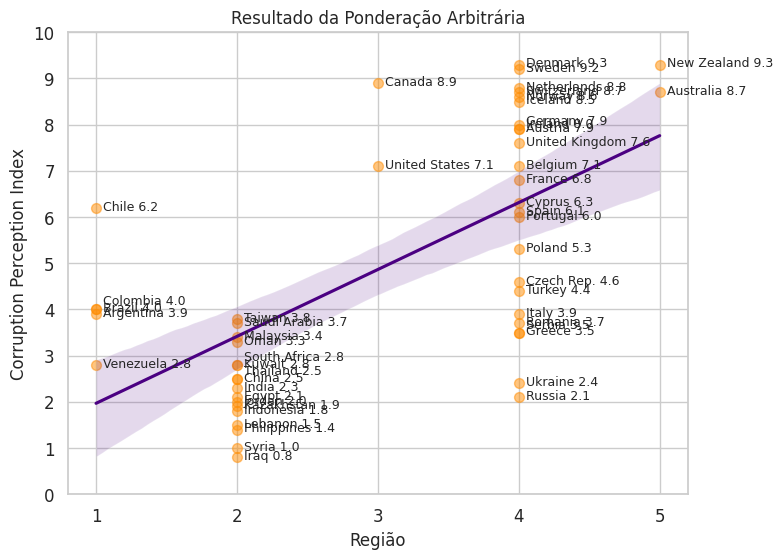

In [405]:
# Plotando os fitted values do 'modelo_corrupcao_errado' considerando, PROPOSITALMENTE, a ponderação arbitrária.
# Ou seja, assumindo que as regiões representam valores numéricos (América do Sul = 1; Ásia = 2; EUA e Canadá = 3; Europa = 4; Oceania = 5).

plt.figure(figsize=(8,6))

ax =sns.regplot(data=df_corrupcao, x="regiao_numerico", y="cpi",
    scatter_kws={"s": 50, "color": "darkorange", "alpha": 0.5}, line_kws={"color": "indigo"})

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        offset = 0
        while ax.texts:
            overlapping = False
            for text in ax.texts:
                overlapping |= text.get_position()[0] == (point['x'] + 0.05) and text.get_position()[1] == (point['y'] - 0.05 + offset)
            if overlapping:
                offset += 0.15
            else:
                break
        ax.annotate(str(point['val']) + " " + str(point['y']),
                    (point['x'] + 0.05,
                     point['y'] - 0.05 + offset),
                    fontsize=9)
                
plt.title('Resultado da Ponderação Arbitrária', fontsize=12)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Corruption Perception Index', fontsize=12)
plt.xticks(range(1, 6, 1), fontsize=12)
plt.yticks(range(0, 11, 1), fontsize=12)
label_point(x = df_corrupcao['regiao_numerico'], y = df_corrupcao['cpi'], val = df_corrupcao['pais'],ax = plt.gca())
plt.show()

In [406]:
# Dummizando a variável 'regiao'. O código abaixo automaticamente fará:
#    a) o estabelecimento de dummies que representarão cada uma das regiões do dataset;
#    b) removerá a variável original a partir da qual houve a dummização;
#    c) estabelecerá como categoria de referência a primeira categoria, ou seja, a categoria 'America_do_sul' por meio do argumento 'drop_first=True'.

df_corrupcao_dummies = pd.get_dummies(df_corrupcao, columns=['regiao'], dtype=int, drop_first=True)
df_corrupcao_dummies.head(10)

,pais,cpi,regiao_numerico,regiao_Asia,regiao_EUA_e_Canada,regiao_Europa,regiao_Oceania
0,Argentina,3.9,1,0,0,0,0
1,Australia,8.7,5,0,0,0,1
2,Austria,7.9,4,0,0,1,0
3,Belgium,7.1,4,0,0,1,0
4,Brazil,4.0,1,0,0,0,0
5,Canada,8.9,3,0,1,0,0
6,Chile,6.2,1,0,0,0,0
7,China,2.5,2,1,0,0,0
8,Colombia,4.0,1,0,0,0,0
9,Cyprus,6.3,4,0,0,1,0


In [407]:
# A variável 'regiao' estava inicialmente definida como 'object' no dataframe original 'df_corrupcao'.
df_corrupcao['regiao'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: regiao
Non-Null Count  Dtype 
--------------  ----- 
50 non-null     object
dtypes: object(1)
memory usage: 528.0+ bytes


In [408]:
# Este procedimento de dummização também poderia ter sido realizado em uma variável do tipo 'category' ou 'string'!
# Estimação do modelo de regressão múltipla com n-1 dummies

modelo_corrupcao_dummies = sm.OLS.from_formula(
    "cpi ~ regiao_Asia + \
    regiao_EUA_e_Canada + \
    regiao_Europa + \
    regiao_Oceania",
    df_corrupcao_dummies).fit()

# Parâmetros do 'modelo_corrupcao_dummies'
modelo_corrupcao_dummies.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cpi   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     17.09
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           1.37e-08
Time:                        15:46:44   Log-Likelihood:                -96.620
No. Observations:                  50   AIC:                             203.2
Df Residuals:                      45   BIC:                             212.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.1800      0.788      5.306      0.000       2.593       5.767
regiao_Asia            -1.8506      0.896     -2.065      0.045      -3.655      -0.046
regiao_EUA_e_Canada     3.8200      1.474      2.592      0.013       0.852       6.788
regiao_Europa           2.0783      0.866      2.400      0.021       0.334       3.822
regiao_Oceania          4.8200      1.474      3.271      0.002       1.852       7.788
==============================================================================
Omnibus:                        1.205   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                1.083
Skew:                          -0.347   Prob(JB):                        0.582
Kurtosis:                       2.804   Cond. No.                         9.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [409]:
# Outro método de estimação (sugestão de uso para muitas dummies no dataset).

# Definição da fórmula utilizada no modelo.
lista_colunas = list(df_corrupcao_dummies.drop(columns=['cpi','pais', 'regiao_numerico']).columns)

formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "cpi ~ " + formula_dummies_modelo
print("Fórmula utilizada: ",formula_dummies_modelo)

# Estimação.
modelo_corrupcao_dummies = sm.OLS.from_formula(formula_dummies_modelo, df_corrupcao_dummies).fit()

# Parâmetros do 'modelo_corrupcao_dummies'.
modelo_corrupcao_dummies.summary()

Fórmula utilizada:  cpi ~ regiao_Asia + regiao_EUA_e_Canada + regiao_Europa + regiao_Oceania


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cpi   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     17.09
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           1.37e-08
Time:                        15:46:44   Log-Likelihood:                -96.620
No. Observations:                  50   AIC:                             203.2
Df Residuals:                      45   BIC:                             212.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.1800      0.788      5.306      0.000       2.593       5.767
regiao_Asia            -1.8506      0.896     -2.065      0.045      -3.655      -0.046
regiao_EUA_e_Canada     3.8200      1.474      2.592      0.013       0.852       6.788
regiao_Europa           2.0783      0.866      2.400      0.021       0.334       3.822
regiao_Oceania          4.8200      1.474      3.271      0.002       1.852       7.788
==============================================================================
Omnibus:                        1.205   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                1.083
Skew:                          -0.347   Prob(JB):                        0.582
Kurtosis:                       2.804   Cond. No.                         9.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [410]:
# Plotando o 'modelo_corrupcao_dummies' de forma interpolada.
df_corrupcao_dummies['fitted'] = modelo_corrupcao_dummies.fittedvalues
df_corrupcao_dummies.head() # Fitted values do 'modelo_corrupcao_dummies' no dataset 'df_corrupcao_dummies'.

,pais,cpi,regiao_numerico,regiao_Asia,regiao_EUA_e_Canada,regiao_Europa,regiao_Oceania,fitted
0,Argentina,3.9,1,0,0,0,0,4.180000
1,Australia,8.7,5,0,0,0,1,9.000000
2,Austria,7.9,4,0,0,1,0,6.258333
3,Belgium,7.1,4,0,0,1,0,6.258333
4,Brazil,4.0,1,0,0,0,0,4.180000


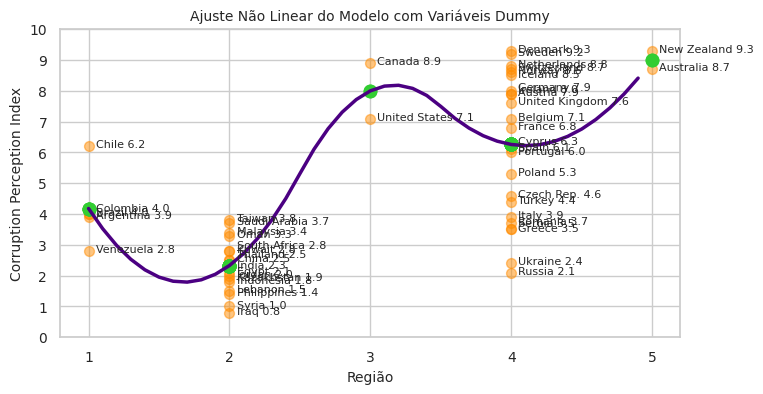

In [411]:
# Gráfico propriamente dito.
plt.figure(figsize=(8,4))

df2 = df_corrupcao_dummies[['regiao_numerico','fitted']].groupby(['regiao_numerico']).median().reset_index()
x = df2['regiao_numerico']
y = df2['fitted']

tck = interpolate.splrep(x, y, k=2)
xnew = np.arange(1, 5, 0.1)
ynew = interpolate.splev(xnew, tck, der=0)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        offset = 0
        while ax.texts:
            overlapping = False
            for text in ax.texts:
                overlapping |= text.get_position()[0] == (point['x'] + 0.05) and text.get_position()[1] == (point['y'] - 0.05 + offset)
            if overlapping:
                offset += 0.15
            else:
                break
        ax.annotate(str(point['val']) + " " + str(point['y']),
                    (point['x'] + 0.05,
                     point['y'] - 0.05 + offset),
                    fontsize=8)

plt.scatter(df_corrupcao_dummies['regiao_numerico'], df_corrupcao_dummies['cpi'], color='darkorange', s=50, alpha=0.5)
plt.scatter(df_corrupcao_dummies['regiao_numerico'], df_corrupcao_dummies['fitted'], color='limegreen', s=80)

plt.plot(xnew, ynew, color='indigo', linewidth=2.5)
plt.title('Ajuste Não Linear do Modelo com Variáveis Dummy', fontsize=10)
plt.xlabel('Região', fontsize=10)
plt.ylabel('Corruption Perception Index', fontsize=10)
plt.xticks(range(1, 6, 1), fontsize=10)
plt.yticks(range(0, 11, 1), fontsize=10)
label_point(x=df_corrupcao_dummies['regiao_numerico'],
            y=df_corrupcao_dummies['cpi'],
            val=df_corrupcao_dummies['pais'],
            ax=plt.gca())
plt.show()

In [412]:
df2 = df_corrupcao_dummies[['regiao_numerico','fitted']].groupby(['regiao_numerico']).median().reset_index()
x = df2['regiao_numerico']
y = df2['fitted']

tck = interpolate.splrep(x, y, k=2)
xnew = np.arange(1, 5, 0.1)
ynew = interpolate.splev(xnew, tck, der=0)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_corrupcao_dummies['regiao_numerico'],
    y=df_corrupcao_dummies['cpi'],
    mode='markers',
    name='CPI',
    marker=dict(color='darkorange', size=14, opacity=0.5)
))

fig.add_trace(go.Scatter(
    x=df_corrupcao_dummies['regiao_numerico'],
    y=df_corrupcao_dummies['fitted'],
    mode='markers',
    name='Fitted',
    marker=dict(color='limegreen', size=12)
))

fig.add_trace(go.Scatter(
    x=xnew,
    y=ynew,
    mode='lines',
    name='Interpolated',
    line=dict(color='indigo', width=3.5)
))

fig.update_layout(title={
        'text': 'Ajuste Não Linear do Modelo com Variáveis Dummy',
        'font': {'size': 20, 'color': 'black', 'family': 'Arial'},
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(title='Região'),
    yaxis=dict(title='Corruption Perception Index'),
    xaxis_tickvals=list(range(1, 6)),
    yaxis_tickvals=list(range(0, 11)),
    xaxis_tickfont=dict(size=14),
    yaxis_tickfont=dict(size=14),
    template='plotly_white')

for i in range(len(df_corrupcao_dummies)):
    fig.add_annotation(
        x=df_corrupcao_dummies['regiao_numerico'][i],
        y=df_corrupcao_dummies['cpi'][i],
        text=str(df_corrupcao_dummies['pais'][i]) + ' ' + str(df_corrupcao_dummies['cpi'][i]),
        showarrow=False,
        font=dict(size=11, color='black'),
        xshift=50,
        yshift=0,
        textangle=0
    )

fig.update_annotations(dict(xref="x", yref="y"))
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

## REGRESSÃO NÃO LINEAR E TRANSFORMAÇÃO DE BOX-COX

In [413]:
url = 'https://raw.githubusercontent.com/filipecarbonera/MBA_USP_Data_Science_Analytics/main/An%C3%A1lise%20de%20Regress%C3%A3o%20Simples%20e%20M%C3%BAltipla/bebes.csv'

df_bebes = pd.read_csv(url, delimiter=',')
df_bebes.head()

,comprimento,idade
0,63.07,19.00
1,65.63,21.00
2,65.63,22.50
3,66.73,22.50
4,66.37,23.25


In [414]:
# Características das variáveis do dataset.
df_bebes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   comprimento  74 non-null     float64
 1   idade        74 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [415]:
# Estatísticas univariadas.
round(df_bebes.describe(),2)

,comprimento,idade
count,74.00,74.00
mean,66.92,25.31
std,12.85,12.98
min,31.90,2.15
25%,56.47,12.50
50%,70.40,26.00
75%,75.81,33.00
max,87.63,60.00


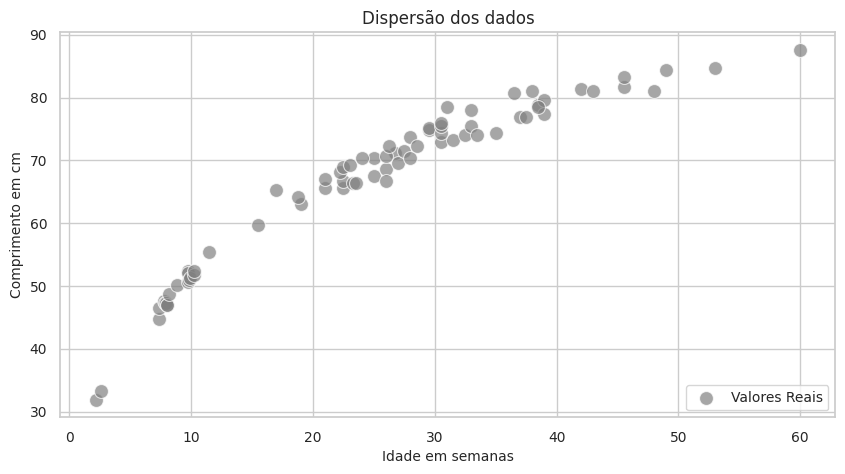

In [416]:
# Gráfico de dispersão.
plt.figure(figsize=(10,5))
sns.scatterplot(x="idade", y="comprimento", data=df_bebes, color='grey', s=100, label='Valores Reais', alpha=0.7)
plt.title('Dispersão dos dados', fontsize=12)
plt.xlabel('Idade em semanas', fontsize=10)
plt.ylabel('Comprimento em cm', fontsize=10)
plt.legend(loc='lower right', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [417]:
# Estimação de um modelo OLS linear.
modelo_linear = sm.OLS.from_formula('comprimento ~ idade', df_bebes).fit()

# Parâmetros do 'modelo_linear'.
modelo_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            comprimento   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     667.7
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           3.72e-38
Time:                        15:46:47   Log-Likelihood:                -207.26
No. Observations:                  74   AIC:                             418.5
Df Residuals:                      72   BIC:                             423.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.1004      1.034     41.665      0.000      41.038      45.163
idade          0.9411      0.036     25.841      0.000       0.868       1.014
==============================================================================
Omnibus:                       21.203   Durbin-Watson:                   0.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.159
Skew:                          -1.218   Prob(JB):                     4.66e-07
Kurtosis:                       4.877   Cond. No.                         62.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

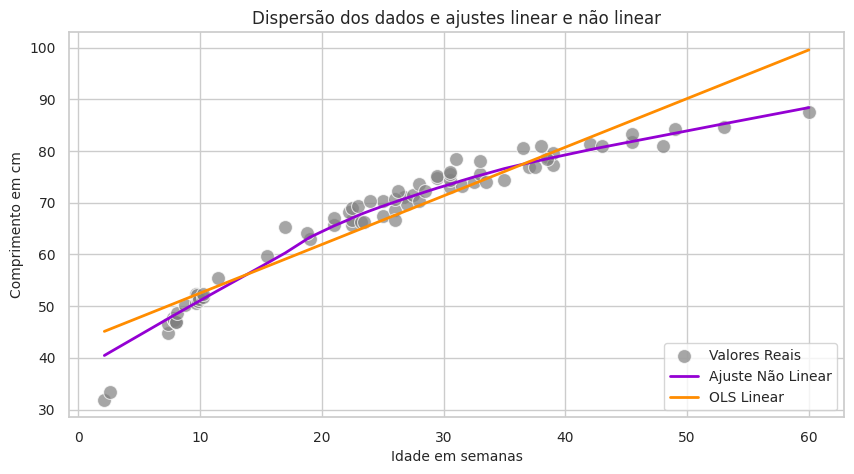

In [418]:
# Gráfico de dispersão com ajustes (fits) linear e não linear com argumento 'lowess=True' (locally weighted scatterplot smoothing).
plt.figure(figsize=(10,5))
sns.scatterplot(x="idade", y="comprimento", data=df_bebes, color='grey', s=100, label='Valores Reais', alpha=0.7)

sns.regplot(x="idade", y="comprimento", data=df_bebes, lowess=True,
            color='darkviolet', ci=False, scatter=False, label='Ajuste Não Linear',
            line_kws={'linewidth': 2})

sns.regplot(x="idade", y="comprimento", data=df_bebes,
            color='darkorange', ci=False, scatter=False, label='OLS Linear',
            line_kws={'linewidth': 2})

plt.title('Dispersão dos dados e ajustes linear e não linear', fontsize=12)
plt.xlabel('Idade em semanas', fontsize=10)
plt.ylabel('Comprimento em cm', fontsize=10)
plt.legend(loc='lower right', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [419]:
# Teste de verificação da aderência dos resíduos à normalidade.

# Teste de Shapiro-Wilk (n < 30)
# Teste de Shapiro-Francia (n >= 30)

# Teste de Shapiro-Francia: interpretação.
teste_sf = shapiro_francia(modelo_linear.resid) # criação do objeto 'teste_sf'.
teste_sf = teste_sf.items() # retorna o grupo de pares de valores-chave no dicionário.

method, statistics_W, statistics_z, p = teste_sf # definição dos elementos da lista (tupla).

alpha = 0.05 # nível de significância.
print()

if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.9087044262594457
statistics z  :  3.6276504915453827
p-value  :  0.00014300603555437503

Rejeita-se H0 - Distribuição não aderente à normalidade


**Autores do pacote:**

Luiz Paulo Fávero e Helder Prado Santos:

https://stats-tests.github.io/statstests/

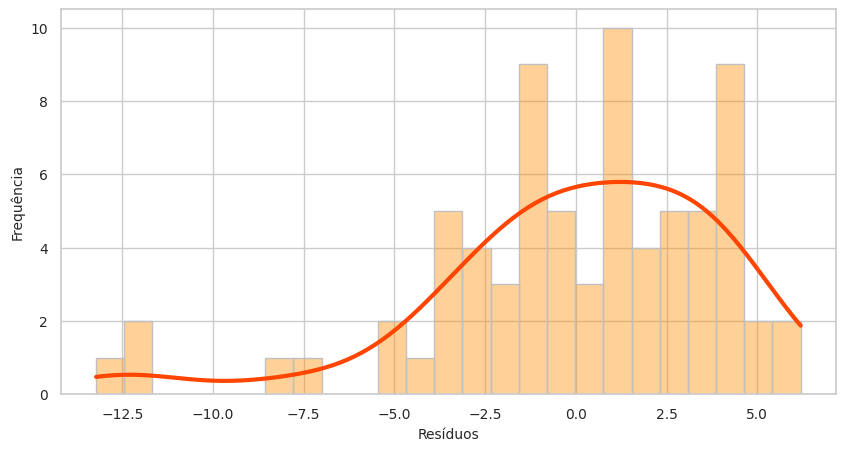

In [420]:
# In[4.7]: Histograma dos resíduos do modelo OLS linear

plt.figure(figsize=(10,5))
hist1 = sns.histplot(data=modelo_linear.resid, kde=True, bins=25, color = 'darkorange', alpha=0.4, edgecolor='silver', line_kws={'linewidth': 3})
hist1.get_lines()[0].set_color('orangered')
plt.xlabel('Resíduos', fontsize=10)
plt.ylabel('Frequência', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [421]:
# Transformação de Box-Cox.

# 'yast' é uma variável que traz os valores transformados (Y*).
# 'lmbda' é o lambda de Box-Cox.
yast, lmbda = boxcox(df_bebes['comprimento'])

# Inserção da variável transformada ('bc_comprimento') no dataset para a estimação de um novo modelo.
df_bebes['bc_comprimento'] = yast
df_bebes.head(10)

,comprimento,idade,bc_comprimento
0,63.07,19.00,22966.092606
1,65.63,21.00,25529.075884
2,65.63,22.50,25529.075884
3,66.73,22.50,26682.733457
4,66.37,23.25,26301.668594
5,66.37,23.50,26301.668594
6,67.47,25.00,27476.805972
7,70.40,25.00,30765.087057
8,68.57,26.00,28684.162971
9,71.13,26.75,31620.682442


In [422]:
# Verificação do cálculo, apenas para fins didáticos.
df_bebes['bc_comprimento2'] = ((df_bebes['comprimento']**lmbda)-1)/lmbda
df_bebes.head(10)

,comprimento,idade,bc_comprimento,bc_comprimento2
0,63.07,19.00,22966.092606,22966.092606
1,65.63,21.00,25529.075884,25529.075884
2,65.63,22.50,25529.075884,25529.075884
3,66.73,22.50,26682.733457,26682.733457
4,66.37,23.25,26301.668594,26301.668594
5,66.37,23.50,26301.668594,26301.668594
6,67.47,25.00,27476.805972,27476.805972
7,70.40,25.00,30765.087057,30765.087057
8,68.57,26.00,28684.162971,28684.162971
9,71.13,26.75,31620.682442,31620.682442


In [423]:
# Retira a variável 'bc_comprimento2', usada para fins didáticos.
del df_bebes['bc_comprimento2']

In [424]:
# Estimando um novo modelo OLS com variável dependente transformada por Box-Cox.
modelo_bc = sm.OLS.from_formula('bc_comprimento ~ idade', df_bebes).fit()

# Parâmetros do 'modelo_bc'.
modelo_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bc_comprimento   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1822.
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           7.16e-53
Time:                        15:46:49   Log-Likelihood:                -681.77
No. Observations:                  74   AIC:                             1368.
Df Residuals:                      72   BIC:                             1372.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4995.1615    630.253      7.926      0.000    3738.775    6251.548
idade        947.2302     22.189     42.689      0.000     902.997     991.463
==============================================================================
Omnibus:                        1.140   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                0.557
Skew:                           0.098   Prob(JB):                        0.757
Kurtosis:                       3.377   Cond. No.                         62.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [425]:
# Comparando os parâmetros do 'modelo_linear' com os do 'modelo_bc'.

# CUIDADO!!! OS PARÂMETROS NÃO SÃO DIRETAMENTE COMPARÁVEIS!

summary_col([modelo_linear, modelo_bc])

,comprimento,bc_comprimento
Intercept,43.1004,4995.1615
,(1.0345),(630.2530)
idade,0.9411,947.2302
,(0.0364),(22.1889)
R-squared,0.9027,0.9620
R-squared Adj.,0.9013,0.9615


In [426]:
# Outro modo mais completo também pela função 'summary_col'
summary_col([modelo_linear, modelo_bc],
            model_names=["MODELO LINEAR","MODELO BOX-COX"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,MODELO LINEAR,MODELO BOX-COX
Intercept,43.1004***,4995.1615***
,(1.0345),(630.2530)
idade,0.9411***,947.2302***
,(0.0364),(22.1889)
R-squared,0.9027,0.9620
R-squared Adj.,0.9013,0.9615
N,74,74


In [427]:
# Repare que há um salto na qualidade do ajuste para o modelo não linear (R²).
pd.DataFrame({'R² OLS':[round(modelo_linear.rsquared,4)], 'R² Box-Cox':[round(modelo_bc.rsquared,4)]})

,R² OLS,R² Box-Cox
0,0.9027,0.962


In [428]:
# Verificando a normalidade dos resíduos do 'modelo_bc'.

# Teste de Shapiro-Francia: interpretação.
teste_sf = shapiro_francia(modelo_bc.resid) # criação do objeto 'teste_sf'.
teste_sf = teste_sf.items() # retorna o grupo de pares de valores-chave no dicionário.
method, statistics_W, statistics_z, p = teste_sf # definição dos elementos da lista (tupla).

alpha = 0.05 # nível de significância.
print()

if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.9729952064687977
statistics z  :  1.2666154523890727
p-value  :  0.10264641223384502

Não se rejeita H0 - Distribuição aderente à normalidade


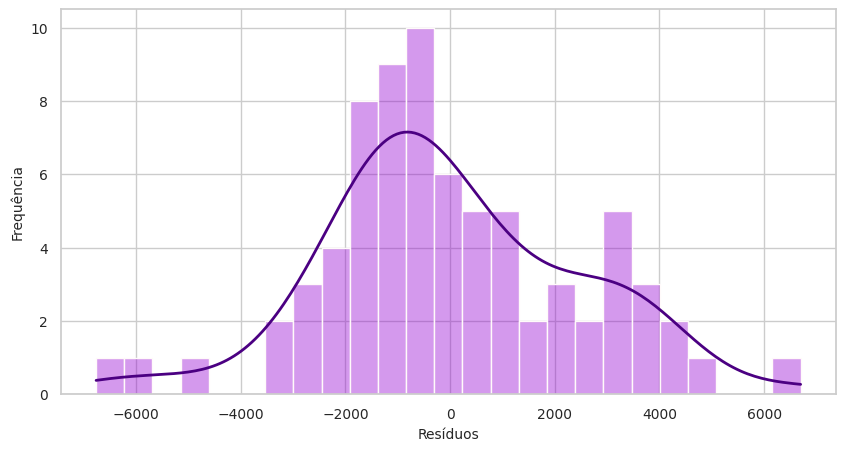

In [429]:
# Histograma dos resíduos do modelo_bc.
plt.figure(figsize=(10,5))
hist2 = sns.histplot(data=modelo_bc.resid, kde=True, bins=25, color='darkviolet', alpha=0.4, edgecolor='snow', line_kws={'linewidth': 2})
hist2.get_lines()[0].set_color('indigo')
plt.xlabel('Resíduos', fontsize=10)
plt.ylabel('Frequência', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [430]:
# Fazendo predições com os modelos OLS linear e Box-Cox.
# Qual é o comprimento esperado de um bebê com 52 semanas de vida?

# Modelo OLS Linear.
print('Modelo OLS Linear:\n', modelo_linear.predict(pd.DataFrame({'idade':[52]})),'\n')

# Modelo Não Linear (Box-Cox).
print('Modelo Não Linear (Box-Cox):\n', modelo_bc.predict(pd.DataFrame({'idade':[52]})))

Modelo OLS Linear:
 0    92.037486
dtype: float64 

Modelo Não Linear (Box-Cox):
 0    54251.133574
dtype: float64


In [431]:
# Não podemos nos esquecer de fazer o cálculo inverso para a obtenção do fitted value de Y (variável 'comprimento').
(54251.109775 * lmbda + 1) ** (1 / lmbda)

87.14005015040935

In [432]:
# Salvando os fitted values dos dois modelos (modelo_linear e modelo_bc) no dataset 'bebes'.

df_bebes['yhat_linear'] = modelo_linear.fittedvalues
df_bebes['yhat_modelo_bc'] = (modelo_bc.fittedvalues * lmbda + 1) ** (1 / lmbda)
df_bebes.head()

,comprimento,idade,bc_comprimento,yhat_linear,yhat_modelo_bc
0,63.07,19.00,22966.092606,60.981260,63.097300
1,65.63,21.00,25529.075884,62.863455,65.004303
2,65.63,22.50,25529.075884,64.275102,66.375858
3,66.73,22.50,26682.733457,64.275102,66.375858
4,66.37,23.25,26301.668594,64.980925,67.044337


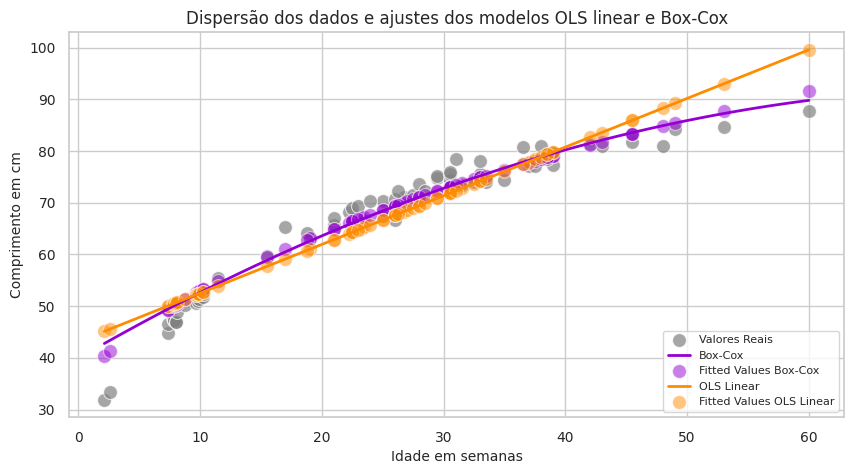

In [433]:
# Gráfico de dispersão com ajustes dos modelos OLS linear e Box-Cox.

plt.figure(figsize=(10,5))

sns.scatterplot(x="idade", y="comprimento", data=df_bebes, color='grey',
    s=100, label='Valores Reais', alpha=0.7)

sns.regplot(x="idade", y="yhat_modelo_bc", data=df_bebes, order=lmbda,
    color='darkviolet', ci=False, scatter=False, label='Box-Cox',
    line_kws={'linewidth': 2})

sns.scatterplot(x="idade", y="yhat_modelo_bc", data=df_bebes, color='darkviolet',
    s=100, label='Fitted Values Box-Cox', alpha=0.5)

sns.regplot(x="idade", y="yhat_linear", data=df_bebes,
    color='darkorange', ci=False, scatter=False, label='OLS Linear',
    line_kws={'linewidth': 2})

sns.scatterplot(x="idade", y="yhat_linear", data=df_bebes, color='darkorange',
    s=100, label='Fitted Values OLS Linear', alpha=0.5)

plt.title('Dispersão dos dados e ajustes dos modelos OLS linear e Box-Cox', fontsize=12)

plt.xlabel('Idade em semanas', fontsize=10)
plt.ylabel('Comprimento em cm', fontsize=10)
plt.legend(loc='lower right', fontsize=8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [434]:
# Gráfico de dispersão com ajustes dos modelos OLS linear e Box-Cox, com interação.

# Ajuste polinomial com grau igual a lambda (lmbda = 2.659051008426254).
coefficients = np.polyfit(df_bebes["idade"], df_bebes["yhat_modelo_bc"], lmbda)
x_range = np.linspace(df_bebes["idade"].min(), df_bebes["idade"].max(), 100)
y_quadratic = np.polyval(coefficients, x_range)

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_bebes["idade"], y=df_bebes["comprimento"],
    mode='markers',
    marker=dict(color='grey', opacity=0.7, size=10),
    name='Valores Reais'))

fig.add_trace(go.Scatter(x=x_range, y=y_quadratic,
    mode='lines',
    line=dict(color='darkviolet', width=2),
    name='Box-Cox'))

fig.add_trace(go.Scatter(x=df_bebes["idade"], y=df_bebes["yhat_modelo_bc"],
    mode='markers',
    marker=dict(color='darkviolet', opacity=0.5, size=10),
    name='Fitted Values Box-Cox',
    hovertemplate='Fitted Values Box-Cox: %{y:.2f}<extra></extra>'))

fig.add_trace(go.Scatter(x=df_bebes["idade"], y=df_bebes["yhat_linear"],
    mode='lines',
    marker=dict(color='darkorange'),
    name='OLS Linear',
    hovertemplate='Fitted Values OLS Linear: %{y:.2f}<extra></extra>'))

fig.add_trace(go.Scatter(x=df_bebes["idade"], y=df_bebes["yhat_linear"],
    mode='markers',
    marker=dict(color='darkorange', opacity=0.5, size=10),
    name='Fitted Values OLS Linear',
    hovertemplate='Fitted Values OLS Linear: %{y:.2f}<extra></extra>'))

fig.update_layout(
    width=1000,
    height=600,
    title={
        'text': 'Dispersão dos dados e ajustes dos modelos OLS linear e Box-Cox',
        'font': {'size': 20, 'color': 'black', 'family': 'Arial'},
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Idade em semanas',
    yaxis_title='Comprimento em cm',
    legend=dict(x=1.02, y=1),
    template='plotly_white')

fig.update_annotations(dict(xref="x", yref="y"))
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

## REGRESSÃO NÃO LINEAR MÚLTIPLA

In [435]:
df_empresas = pd.read_csv('empresas.csv', delimiter=',')
df_empresas.head()

,empresa,retorno,disclosure,endividamento,ativos,liquidez
0,Adidas,63.67,83,1.3,3967,14.3
1,BASF,55.49,91,33.9,5450,16.8
2,Bayer,52.42,77,36.1,4327,15.5
3,BSH,54.00,90,20.8,4109,16.8
4,Bosch,68.01,93,14.1,4458,17.0


In [436]:
# Características das variáveis do dataset
df_empresas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   empresa        124 non-null    object 
 1   retorno        124 non-null    float64
 2   disclosure     124 non-null    int64  
 3   endividamento  124 non-null    float64
 4   ativos         124 non-null    int64  
 5   liquidez       124 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 5.9+ KB


In [437]:
# Estatísticas univariadas
df_empresas.describe()

,retorno,disclosure,endividamento,ativos,liquidez
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,46.195484,49.677419,27.734677,3739.064516,12.300000
std,15.075886,31.338059,12.454287,1538.500462,3.141746
min,21.030000,6.000000,1.200000,1851.000000,7.900000
25%,33.840000,18.000000,18.525000,2597.000000,9.300000
50%,44.175000,41.000000,24.950000,3476.000000,12.200000
75%,58.205000,83.000000,34.125000,4458.000000,15.800000
max,86.180000,98.000000,64.900000,9010.000000,17.000000


In [438]:
# Matriz de correlações.
correlation_matrix = df_empresas.iloc[:,1:6].corr()
correlation_matrix

,retorno,disclosure,endividamento,ativos,liquidez
retorno,1.000000,0.863747,0.004577,0.811349,0.859083
disclosure,0.863747,1.000000,0.136587,0.831343,0.867605
endividamento,0.004577,0.136587,1.000000,0.228085,-0.081803
ativos,0.811349,0.831343,0.228085,1.000000,0.702286
liquidez,0.859083,0.867605,-0.081803,0.702286,1.000000


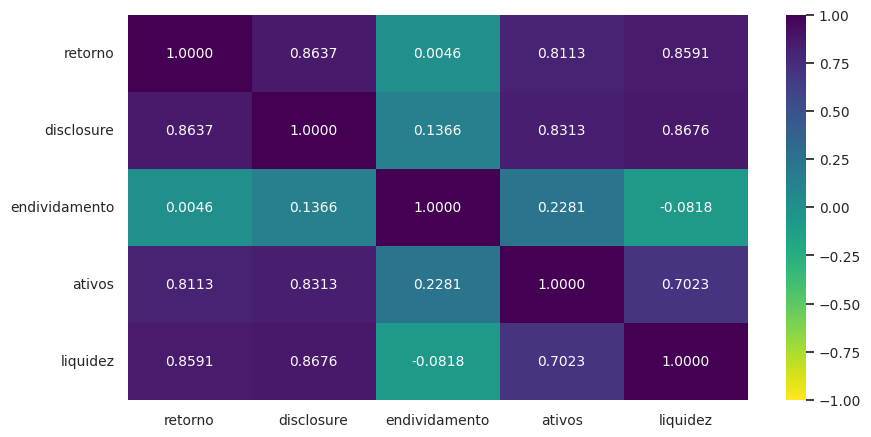

In [439]:
# Mapa de calor com as correlações entre todas as variáveis quantitativas.
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".4f",
                      cmap=plt.cm.viridis_r,
                      annot_kws={'size': 10}, vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.show()

In [440]:
# Matriz de correlações.
correlation_matrix2 = pg.rcorr(df_empresas, method='pearson', upper='pval', decimals=4, pval_stars={0.01: '***', 0.05: '**', 0.10: '*'})
correlation_matrix2 # Maneira mais elaborada pela função 'rcorr' do pacote 'pingouin'.

,retorno,disclosure,endividamento,ativos,liquidez
retorno,-,***,,***,***
disclosure,0.8637,-,,***,***
endividamento,0.0046,0.1366,-,**,
ativos,0.8113,0.8313,0.2281,-,***
liquidez,0.8591,0.8676,-0.0818,0.7023,-


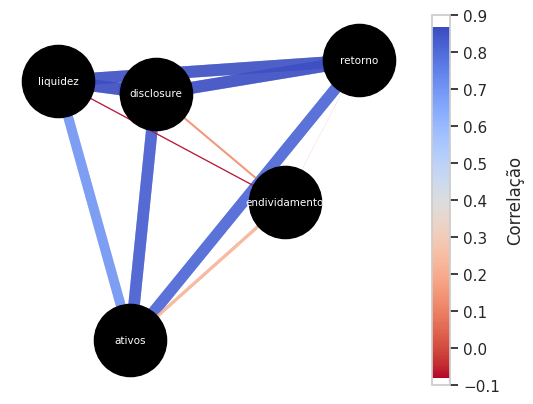

In [441]:
# Diagrama interessante (grafo) que mostra a inter-relação entre as variáveis e a magnitude das correlações entre elas.

# Criação de um grafo direcionado.
G = nx.DiGraph()

# Adição das variáveis como nós do grafo.
for variable in correlation_matrix.columns:
    G.add_node(variable)

# Adição das arestas com espessuras proporcionais às correlações.
for i, variable1 in enumerate(correlation_matrix.columns):
    for j, variable2 in enumerate(correlation_matrix.columns):
        if i != j:
            correlation = correlation_matrix.iloc[i, j]
            if abs(correlation) > 0:
                G.add_edge(variable1, variable2, weight=correlation)

# Obtenção da lista de correlações das arestas.
correlations = [d["weight"] for _, _, d in G.edges(data=True)]

# Definição da dimensão dos nós.
node_size = 2700

# Definição da cor dos nós.
node_color = 'black'

# Definição da escala de cores das retas (correspondência com as correlações).
cmap = plt.colormaps.get_cmap('coolwarm_r')

# Criação de uma lista de espessuras das arestas proporcional às correlações.
edge_widths = [abs(d["weight"]) * 10 for _, _, d in G.edges(data=True)]

# Criação do layout do grafo com maior distância entre os nós.
pos = nx.spring_layout(G, k=0.75)  # k para controlar a distância entre os nós.

# Ajuste das posições dos nós das variáveis.
pos["retorno"] = (pos["retorno"][0] + 1.8, pos["retorno"][1] + 1.8)
pos["disclosure"] = (pos["disclosure"][0], pos["disclosure"][1] + 1.8)
pos["endividamento"] = (pos["endividamento"][0], pos["endividamento"][1] + 1.8)
pos["ativos"] = (pos["ativos"][0], pos["ativos"][1])
pos["liquidez"] = (pos["liquidez"][0], pos["liquidez"][1] + 1.8)

# Desenho dos nós e das arestas com base nas correlações e espessuras.
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=correlations, edge_cmap=cmap, alpha=0.7)

# Adição dos rótulos dos nós.
labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=7.5, font_color='white')

# Ajuste dos limites dos eixos.
ax = plt.gca()
ax.margins(0.1)
plt.axis("off")

# Criação da legenda com a escala de cores definida.
smp = cm.ScalarMappable(cmap=cmap)
smp.set_array([min(correlations), max(correlations)])
cbar = plt.colorbar(smp, ax=ax, label='Correlação')

# Definição dos ticks da colorbar.
cbar.set_ticks(np.arange(round(min(correlations),0) - 0.1, max(correlations) + 0.1, 0.1))

# Exibição do gráfico.
plt.show()

<Figure size 1000x500 with 0 Axes>

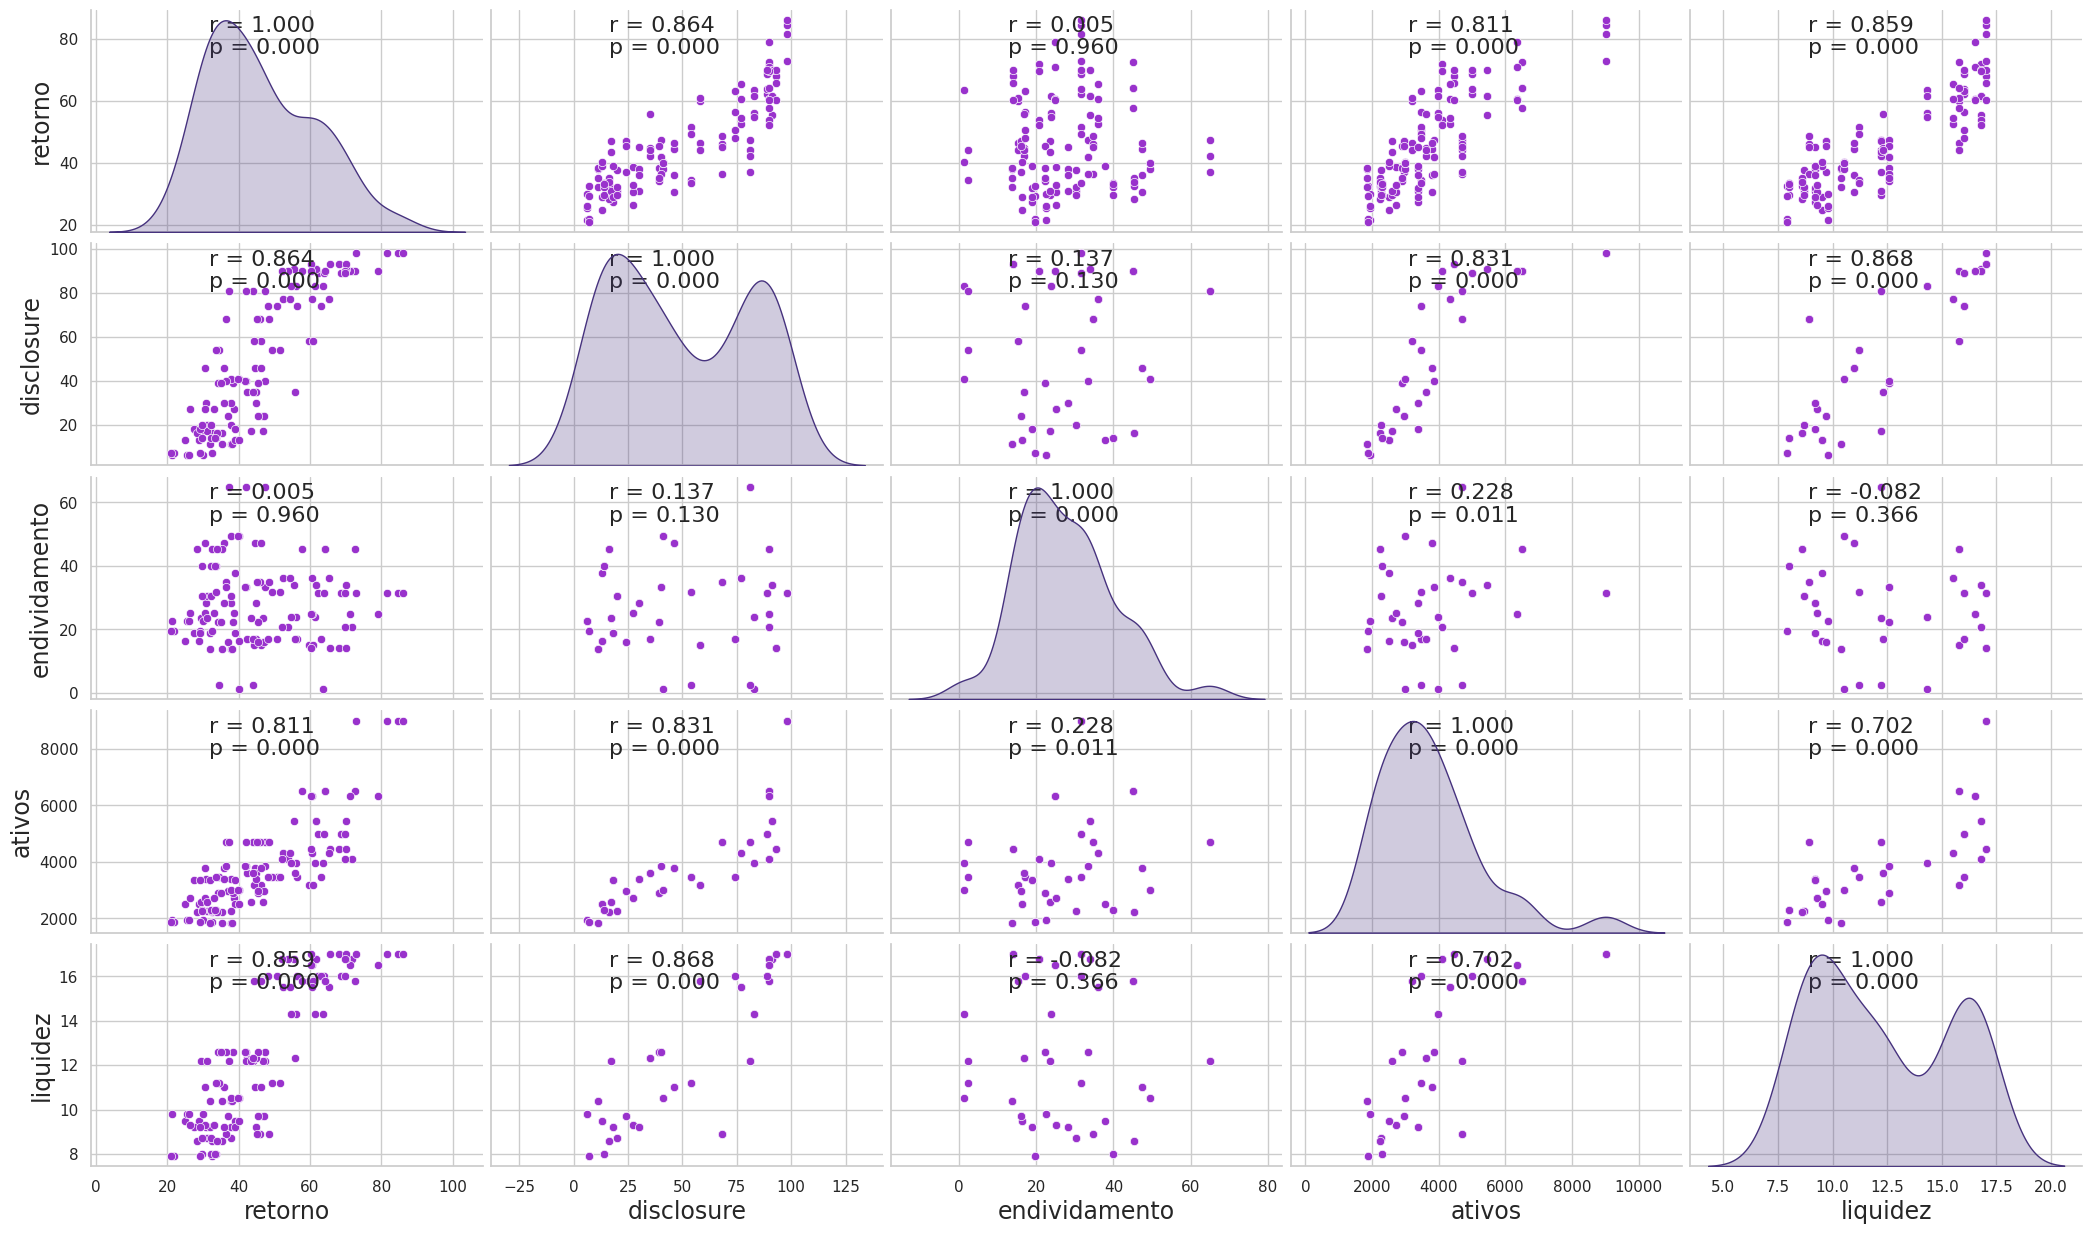

In [442]:
# Distribuições das variáveis, scatters, valores das correlações e suas respectivas significâncias.

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.3f}".format(r), xy=(.30, .9), xycoords=ax.transAxes, fontsize=16)
    ax.annotate("p = {:.3f}".format(p), xy=(.30, .8), xycoords=ax.transAxes, fontsize=16)

# Configuração do gráfico.
sns.set(style="whitegrid", palette="viridis")

plt.figure(figsize=(10,5))

graph = sns.pairplot(df_empresas, diag_kind="kde",
                     plot_kws={"color": "darkorchid"},
                     height=2.5, aspect=1.7)
graph.map(corrfunc)
for ax in graph.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=17)
    ax.set_ylabel(ax.get_ylabel(), fontsize=17)
plt.show()

In [443]:
# Estimando o Modelo de Regressão Múltipla.
modelo_empresas = sm.OLS.from_formula('retorno ~ disclosure +\
    endividamento + ativos +\
    
    
    
    
    liquidez', df_empresas).fit()

# Parâmetros do 'modelo_empresas'.
modelo_empresas.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                retorno   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     147.9
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           3.35e-45
Time:                        15:47:01   Log-Likelihood:                -401.07
No. Observations:                 124   AIC:                             812.1
Df Residuals:                     119   BIC:                             826.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.0506      4.080      1.483      0.141      -2.028      14.129
disclosure        0.1067      0.048      2.227      0.028       0.012       0.202
endividamento    -0.0882      0.051     -1.723      0.087      -0.190       0.013
ativos            0.0035      0.001      5.134      0.000       0.002       0.005
liquidez          1.9762      0.396      4.987      0.000       1.191       2.761
==============================================================================
Omnibus:                       35.509   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.127
Skew:                          -0.136   Prob(JB):                       0.0283
Kurtosis:                       1.858   Cond. No.                     2.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note que o parâmetro da variável 'endividamento' não é estatisticamente significante ao nível de significância de 5% (nível de confiança de 95%).